In [1]:
%load_ext autoreload
%autoreload 2

import ncem
import numpy as np
import seaborn as sns

from scipy.stats import ttest_rel, ttest_ind

dir_gs = "/storage/groups/ml01/workspace/anna.schaar/tissue/grid_searches_gen/"
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

sns.set_palette("colorblind")

# MERFISH - brain

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation


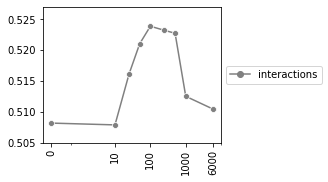

In [3]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'mean_lineplot',
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    xticks=[ 0,  10,   100,  1000, 6000],
)

In [4]:
gs_ed_ncem_max = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_max.load_gs()

test_id_ed = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)

test_id_ed_ncem_max = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_max_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']


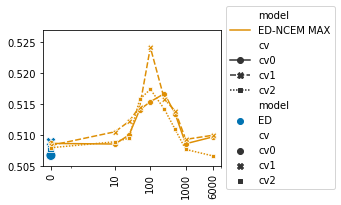

In [5]:
gs_ed_ncem_max.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_MAX_NODES_PATIENT_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

In [6]:
gs_ed_ncem_gcn = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_gcn.load_gs()

test_id_ed_ncem_gcn = gs_ed_ncem_gcn.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_gcn_test_r2 = np.array(
    gs_ed_ncem_gcn.summary_table[gs_ed_ncem_gcn.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']


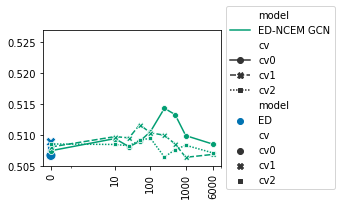

In [7]:
gs_ed_ncem_gcn.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_GCN_NODES_PATIENT_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

In [8]:
print(ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print(ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2), '\n')
print(ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print(ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

Ttest_relResult(statistic=5.355240979482038, pvalue=0.03314531105437973)
Ttest_relResult(statistic=0.9012329859274131, pvalue=0.46258180799729487) 

Ttest_indResult(statistic=-1.3252924337746408, pvalue=0.2557043728365311)
Ttest_indResult(statistic=-3.974839087655377, pvalue=0.016471947026990903)


210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation


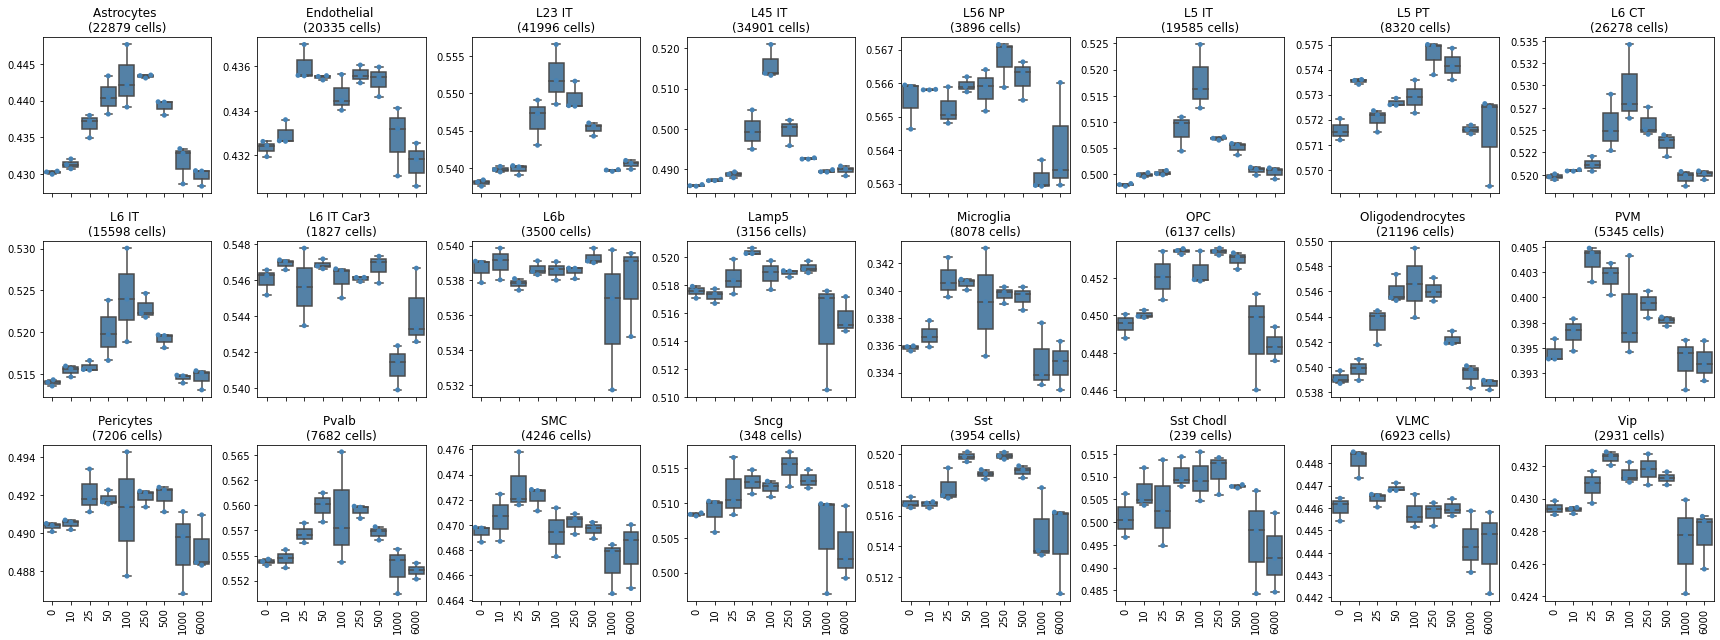

In [9]:
gs_ed_ncem = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem.load_gs()

gs_ed_ncem.load_target_cell_evaluation()
gs_ed_ncem.target_cell_table = gs_ed_ncem.target_cell_table[gs_ed_ncem.target_cell_table['target_cell'] != 'other']

gs_ed_ncem.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [3]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=dir_gs,
    gs_id="210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=1,
    #model_id='210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22',
    lateral_resolution=1
)
ed_ncem_max._fn_model_weights
ed_ncem_max.get_data_again(
    data_path=dir_data + 'zhang/',
    data_origin="zhang"
)
ed_ncem_max.split_data_byidx_again(cv_idx=1)

ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max._model_kwargs['input_shapes']

210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


collecting image-wise celldata


  0%|          | 0/64 [00:00<?, ?it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:05<00:00, 12.48it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv1


(25, 254, 7656, 10, 25, 2)

In [4]:
ed_ncem_max.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 7656, 1, 25, 2)})

setting reinitialized layer weights to layer weights from model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22


In [5]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='L2/3 IT',
    #drop_columns=['L2/3 IT', 'L5/6 NP', 'L5 IT', 'L5 PT', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b', 'Sst Chodl', 'VLMC', 'other'],
    drop_columns=['other'],
    multicolumns=['mouse','slice'],
    #dop_images=['slice20']
)

  0%|          | 0/64 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


/mnt/home/icb/anna.schaar/git/ncem/ncem/interpretation/interpreter.py:695: RuntimeWarning: invalid value encountered in true_divide
  img_saliency.append(saliencies/neighbourhood)
100%|██████████| 64/64 [06:40<00:00,  6.25s/it]


In [6]:
saliencies = saliencies.assign(m=saliencies.mean(axis=1, skipna=False)).sort_values('m', ascending=False).drop('m', axis=1)

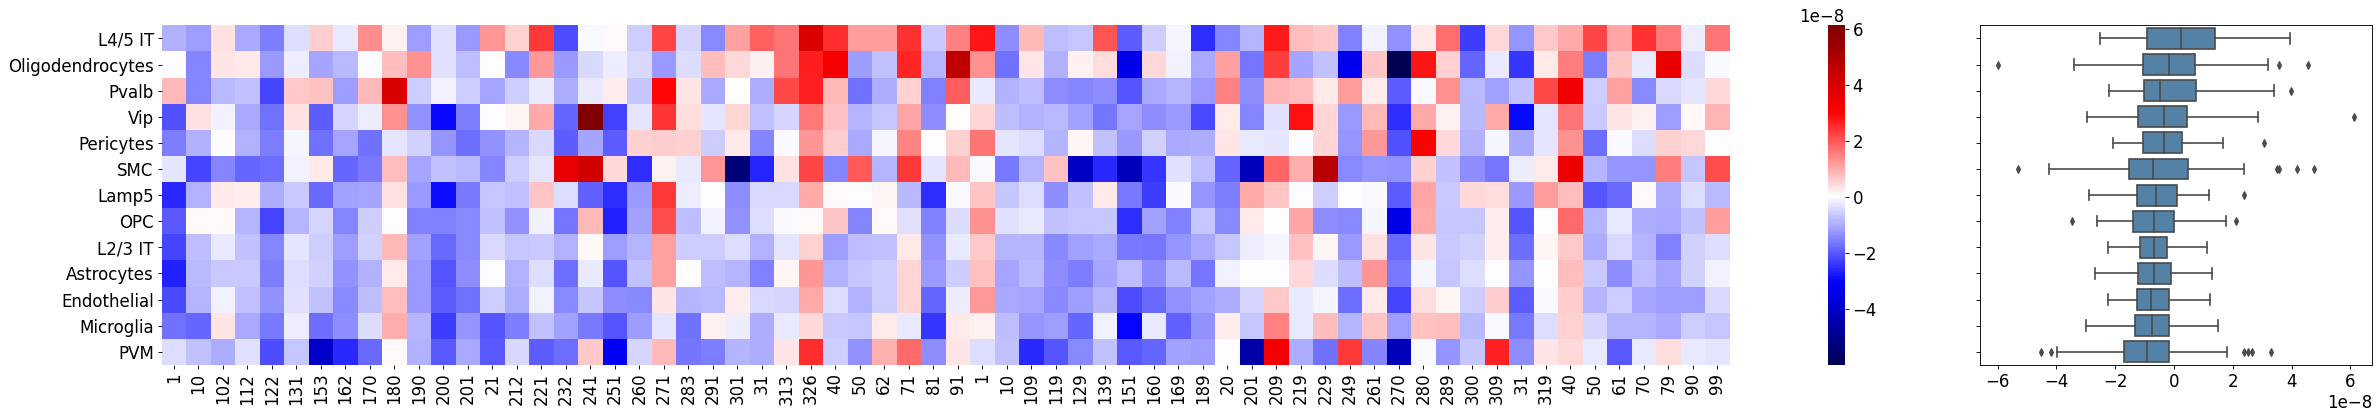

In [12]:
ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies[:13],
    fontsize=15,
    figsize=(30,5.5)
)

# Chip cytometry - colon

In [14]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH",
    ],
    lateral_resolution=0.5
)
gs_linear.load_gs()

test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)

210414_INTERACTIONS_MAX_NODES_PATIENT_1_BUSCH: loaded 72 runs with 3-fold cross validation


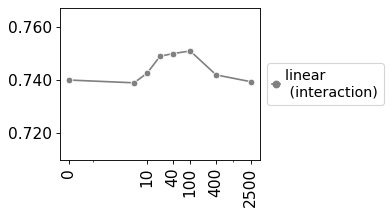

In [15]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "linear \n (interaction)",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.710, 0.767),
    plot_mode = 'mean_lineplot',
    xticks=[ 0, 10, 40, 100, 400, 2500],
)

In [17]:
gs_ed_ncem_max = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210302_LVMNP_NONE_NODES_PATIENT_1_BUSCH",
        "210303_CLVMNP_MAX_NODES_PATIENT_1_BUSCH",
    ],
    lateral_resolution=0.5
)
gs_ed_ncem_max.load_gs()

test_id_ed = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)
test_id_ed_ncem_max = gs_ed_ncem_max.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_max_test_r2 = np.array(
    gs_ed_ncem_max.summary_table[gs_ed_ncem_max.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

210302_LVMNP_NONE_NODES_PATIENT_1_BUSCH: loaded 768 runs with 3-fold cross validation


KeyboardInterrupt: 

In [ ]:
gs_ed_ncem_max.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_MAX_NODES_PATIENT_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.710, 0.767),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[ 0, 10, 40, 100, 400, 2500],
)

In [ ]:
gs_ed_ncem_gcn = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210302_LVMNP_NONE_NODES_PATIENT_1_BUSCH",
        "210303_CLVMNP_GCN_NODES_PATIENT_1_BUSCH",
    ],
    lateral_resolution=0.5
)
gs_ed_ncem_gcn.load_gs()

test_id_ed_ncem_gcn = gs_ed_ncem_gcn.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_PATIENT_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_gcn_test_r2 = np.array(
    gs_ed_ncem_gcn.summary_table[gs_ed_ncem_gcn.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

In [ ]:
gs_ed_ncem_gcn.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_GCN_NODES_PATIENT_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.710, 0.767),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[ 0, 10, 40, 100, 400, 2500],
)

In [ ]:
print(ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print(ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2))
print(ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print(ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

In [ ]:
gs_ed_ncem = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210302_LVMNP_NONE_NODES_PATIENT_1_BUSCH",
        "210303_CLVMNP_MAX_NODES_PATIENT_1_BUSCH",
        "210303_CLVMNP_GCN_NODES_PATIENT_1_BUSCH"
    ],
    lateral_resolution=0.5
)
gs_ed_ncem.load_gs()

gs_ed_ncem.load_target_cell_evaluation()
gs_ed_ncem.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

In [14]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=dir_gs,
    gs_id="210303_CLVMNP_MAX_NODES_PATIENT_1_BUSCH",
    cv_idx=1,
    #model_id='210303_clvmnp_max_nodes_patient_1_busch_adam_lr1_agrFalse_bsS_md4_tk4_n100_fsstandard_ldi2_ei4_di5_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22',
    lateral_resolution=0.5
)
ed_ncem_max._fn_model_weights
ed_ncem_max.get_data_again(
    data_path=dir_data + 'busch/',
    data_origin="jarosch"
)
ed_ncem_max.split_data_byidx_again(cv_idx=1)

ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max._model_kwargs['input_shapes']

210303_CLVMNP_MAX_NODES_PATIENT_1_BUSCH: loaded 452 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210303_clvmnp_max_nodes_patient_1_busch_adam_lr1_agrFalse_bsS_md5_tk4_n100_fsstandard_ldi2_ei4_di5_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
 50%|█████     | 1/2 [00:00<00:00,  9.65it/s]

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00,  9.14it/s]


Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 103.034519
cross-validation selected: cv1


(12, 19, 6460, 100, 12, 1)

In [15]:
ed_ncem_max.reinitialize_model(changed_model_kwargs={'input_shapes': (12, 19, 6460, 1, 12, 1)})

setting reinitialized layer weights to layer weights from model 210303_clvmnp_max_nodes_patient_1_busch_adam_lr1_agrFalse_bsS_md5_tk4_n100_fsstandard_ldi2_ei4_di5_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22


In [16]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='CD8 T cells',
)

  0%|          | 0/2 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 100 to 1


/mnt/home/icb/anna.schaar/git/ncem/ncem/interpretation/interpreter.py:695: RuntimeWarning: invalid value encountered in true_divide
  img_saliency.append(saliencies/neighbourhood)
100%|██████████| 2/2 [00:08<00:00,  4.34s/it]


In [89]:
saliencies

,Area_1,Area_2
B cells,-4.904966e-08,-6.984919e-09
CD4 T cells,-3.638810e-08,-8.185835e-09
CD8 T cells,-3.092072e-09,-3.032070e-08
GATA3+ epithelial,-1.862645e-10,-1.359228e-09
Ki67 epithelial,-7.618551e-08,4.847032e-11
Lamina propria cells,-8.852380e-09,-1.037562e-08
Macrophages,-3.631623e-09,3.725290e-09
Monocytes,1.209085e-09,2.483527e-09
PD-L1+ cells,0.000000e+00,NaN
intraepithelial Lymphocytes,-3.114620e-09,-1.058484e-08


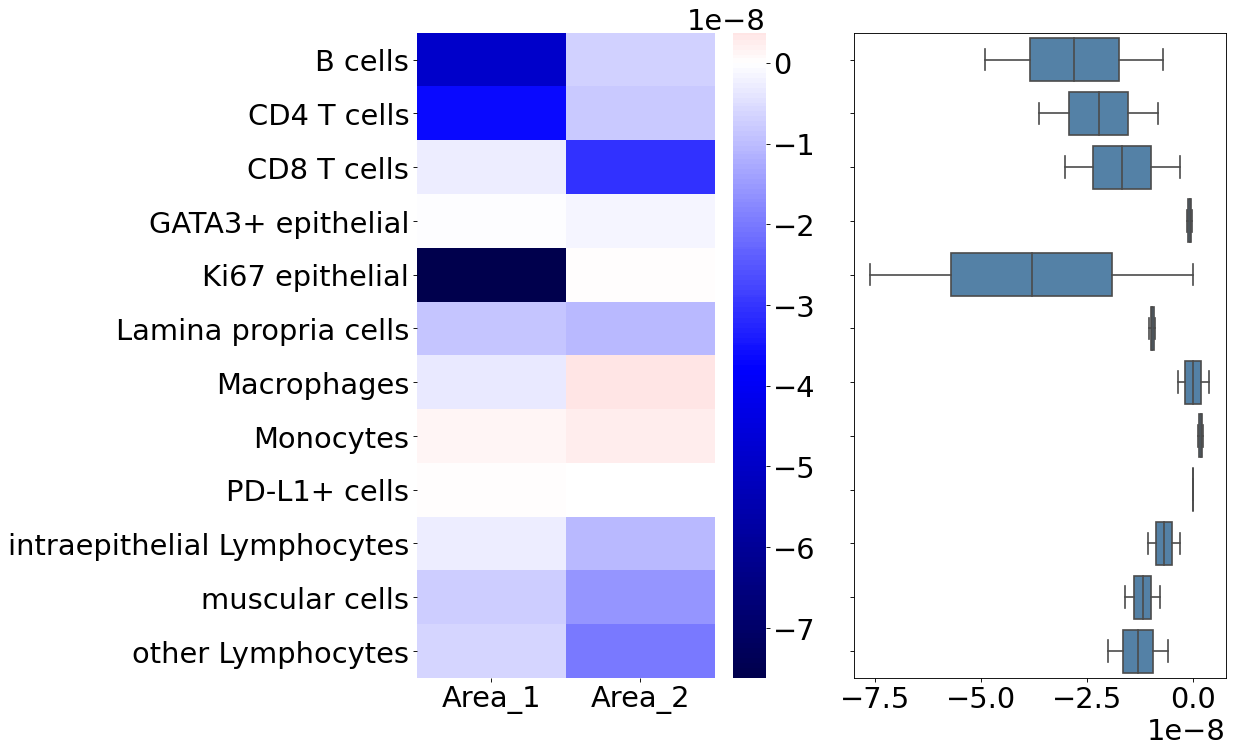

In [19]:
ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies, multiindex=False, figsize=(16,10), width_ratios=[1,1], fontsize=26
)

# MIBI TOF - cancer

In [86]:
gs_linear = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_linear.load_gs()

test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)

210419_INTERACTIONS_MAX_NODES_IMAGE_1_HARTMANN: loaded 24 runs with 3-fold cross validation


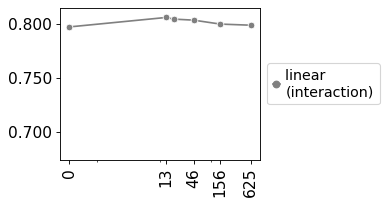

In [87]:
gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_IMAGE_1": "linear \n(interaction)",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'mean_lineplot',
    xticks=[  0,  13,  46, 156, 625],
)

In [88]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

test_id_ed = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)
test_id_ed_ncem_max = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_max_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


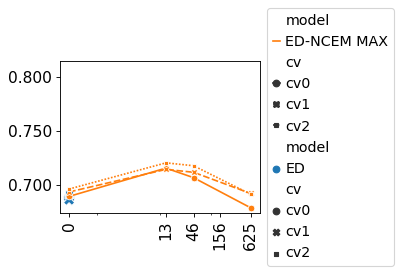

In [89]:
gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_MAX_NODES_IMAGE_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)

In [90]:
gs_lvmnp = ncem.train.GridSearchContainer(
    dir_gs, 
    gs_ids=[
        "210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN",
        "210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN",
    ],
    lateral_resolution=400/1024
)
gs_lvmnp.load_gs()

test_id_ed_ncem_gcn = gs_lvmnp.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_IMAGE_1")],
    partition_select='test', metric_select="r_squared_linreg"
)
ed_ncem_gcn_test_r2 = np.array(
    gs_lvmnp.summary_table[gs_lvmnp.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

210223_LVMNP_NONE_NODES_IMAGE_1_HARTMANN: loaded 12 runs with 3-fold cross validation
210119_CLVMNP_GCN_NODES_IMAGE_1_HARTMANN: loaded 32 runs with 3-fold cross validation


subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_IMAGE_1'], given was ['LVMNP_NONE_NODES_IMAGE_1']


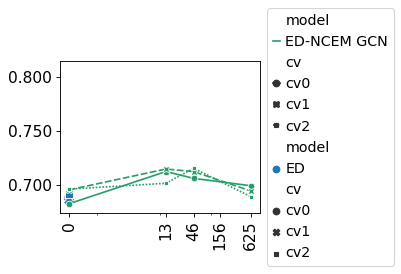

In [91]:
gs_lvmnp.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_IMAGE_1": "ED",
            "CLVMNP_GCN_NODES_IMAGE_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.674, 0.815),
    plot_mode = 'lineplot',
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
    xticks=[  0,  13,  46, 156, 625],
)

In [92]:
print(ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print(ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2))
print(ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print(ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

Ttest_relResult(statistic=13.99895403364687, pvalue=0.005064074601484572)
Ttest_relResult(statistic=5.127340627548463, pvalue=0.03599652697206592)
Ttest_indResult(statistic=-46.69687659557861, pvalue=1.2579788249180536e-06)
Ttest_indResult(statistic=-33.9112751091817, pvalue=4.510879768982605e-06)


In [92]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=dir_gs,
    gs_id="210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN",
    cv_idx=1,
    #model_id='210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22',
    lateral_resolution=1
)
ed_ncem_max._fn_model_weights
ed_ncem_max.get_data_again(
    data_path=dir_data + 'hartmann/',
    data_origin="hartmann"
)
ed_ncem_max.split_data_byidx_again(cv_idx=1)

ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max._model_kwargs['input_shapes']

210119_CLVMNP_MAX_NODES_IMAGE_1_HARTMANN: loaded 26 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210119_clvmnp_max_nodes_image_1_hartmann_adam_lr1_agrFalse_ei2_di1_ldi1_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_bsS_nf1_md1_rs1_tk4_ne3_fsstandard
Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/ic

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:00<00:00, 127.46it/s]


Loaded 58 images with complete data from 4 patients over 63734 cells with 36 cell features and 8 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 4.416425
cross-validation selected: cv1


(8, 36, 2268, 10, 8, 58)

In [93]:
ed_ncem_max.reinitialize_model(
    changed_model_kwargs={'input_shapes': (8, 36, 2268, 1, 8, 58)},
)

setting reinitialized layer weights to layer weights from model 210119_clvmnp_max_nodes_image_1_hartmann_adam_lr1_agrFalse_ei2_di1_ldi1_ede1_dde0_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_bsS_nf1_md1_rs1_tk4_ne3_fsstandard


In [94]:
ed_ncem_max.node_type_names

{'Endothelial': 'Endothelial',
 'Epithelial': 'Epithelial',
 'Fibroblast': 'Fibroblast',
 'Myeloid CD11c': 'Myeloid CD11c',
 'Myeloid CD68': 'Myeloid CD68',
 'Other immune': 'Other immune',
 'Tcell CD4': 'Tcell CD4',
 'Tcell CD8': 'Tcell CD8'}

In [95]:
ed_ncem_max.max_nodes = 2268
ed_ncem_max.img_keys_test = [x.replace('scMEP_point_', '') for x in ed_ncem_max.img_keys_test]
ed_ncem_max.nodes_idx_test_new = {}
for key, value in ed_ncem_max.nodes_idx_test.items():
    ed_ncem_max.nodes_idx_test_new.update({key.replace('scMEP_point_', ''): value})
ed_ncem_max.nodes_idx_test = ed_ncem_max.nodes_idx_test_new

In [96]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='Tcell CD8',
)

  0%|          | 0/58 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


/mnt/home/icb/anna.schaar/git/ncem/ncem/interpretation/interpreter.py:695: RuntimeWarning: invalid value encountered in true_divide
  img_saliency.append(saliencies/neighbourhood)
 78%|███████▊  | 45/58 [00:33<00:09,  1.33it/s]


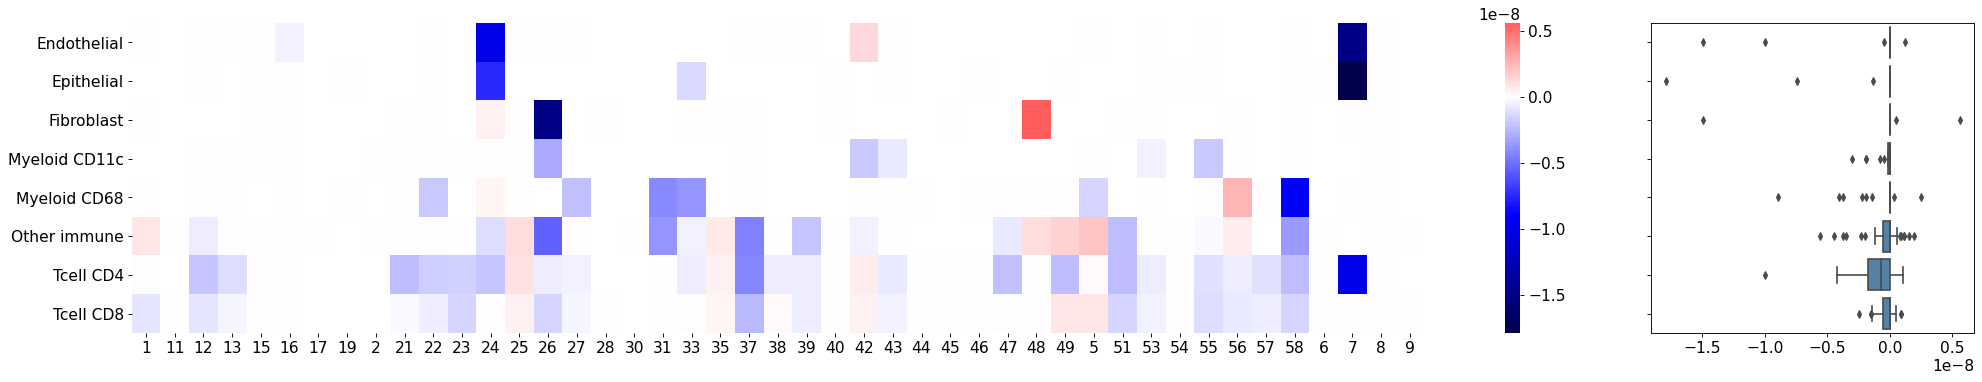

In [97]:
ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies,
    multiindex=False,
    figsize=(25., 5.)
)